In [2]:
import scipy.io
import pandas as pd
import numpy as np
import h5py
 
import h5py
import os

In [3]:
df1 = pd.read_csv('gene_expression.csv')
df1 = df1.T
df1

,0,1,2,3,4,5,6,7,8,9,...,52366,52367,52368,52369,52370,52371,52372,52373,52374,52375
A1C,9.851254,0.083905,9.565760,1.846203,0.609739,1.332916,2.580587,6.430307,2.763203,9.976945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DFC,10.779106,0.037499,10.912357,2.297032,0.810846,1.690322,1.906845,6.797555,2.322745,8.953727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IPC,9.889891,0.126773,12.049826,1.834850,0.625049,0.964450,1.510082,6.372308,2.370826,8.118227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ITC,6.826858,0.047374,8.873071,1.924978,0.737102,1.077249,2.291390,5.584191,1.806142,8.919349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M1C,13.758548,0.039372,10.491391,2.179105,0.785933,2.404122,4.795865,7.664308,2.517962,8.413858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MFC,12.662803,0.030689,9.775835,2.148331,0.804283,1.586986,1.361635,6.361073,2.327110,10.348724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OFC,12.638483,0.000000,11.922996,2.221160,0.915098,1.359363,1.634208,6.991962,2.480929,7.901878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S1C,10.430115,0.110047,10.628808,1.781825,0.715395,2.140175,3.298828,6.626170,2.439870,8.259877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STC,9.059294,0.031884,11.640163,1.741938,0.628813,1.642060,1.921671,6.025278,2.164276,7.065808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V1C,11.165900,0.028823,10.631714,2.102783,0.892369,1.739128,3.678401,6.368328,2.083228,9.345748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2 = pd.read_csv('MFC_AreaGene_median.csv')
df2

,Structure Acronym,Label ID,MFC(g+s),linear_b,linear_R2stats,MFC(g+s)_d1,MFC(g+s)_d2,MFC(g+s)_d3,MFC(g+s)_d4,MFC(g+s)_d5
0,A1C,1,0.267803,0.020562,0.080942,0.194774,0.199233,0.173827,0.219958,0.525159
1,DFC,2,0.180257,0.013429,0.039992,0.136178,0.100308,0.210568,0.226953,0.388549
2,IPC,3,0.204035,0.006276,0.010259,0.056163,0.124834,0.191087,0.199146,0.484161
3,ITC,4,0.127279,0.009807,0.028638,0.211500,0.154106,0.142907,0.138762,0.333341
4,M1C,5,0.312330,0.008201,0.014977,0.107835,0.161534,0.229341,0.335346,0.630110
5,MFC,6,0.180106,0.007247,0.013351,0.155211,0.192708,0.177517,0.149583,0.337542
6,OFC,8,0.118595,0.008642,0.024058,0.217354,0.156595,0.136436,0.117245,0.203524
7,S1C,9,0.282142,0.007844,0.014051,0.078746,0.126494,0.189803,0.302841,0.603867
8,STC,10,0.144475,0.005342,0.010143,0.082295,0.110563,0.122455,0.167731,0.407014
9,V1C,11,0.192492,0.016801,0.063679,0.112020,0.147159,0.165481,0.129030,0.529913


In [5]:
   import pandas as pd
   from scipy.stats import pearsonr

   # 假设df1和df2已经定义好
   # 计算df2与df1每一列数据的皮尔逊相关系数和p值
   correlation_coefficients = []
   p_values = []
   for column in df1.columns:
       correlation, p_value = pearsonr(df2['MFC(g+s)'], df1[column])
       correlation_coefficients.append(correlation)
       p_values.append(p_value)

D:\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [6]:
gene = pd.read_csv('rows_metadata.csv')
gene

,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id
0,1,7062.0,ENSG00000000003,TSPAN6,7105.0
1,2,40735.0,ENSG00000000005,TNMD,64102.0
2,3,8736.0,ENSG00000000419,DPM1,8813.0
3,4,36423.0,ENSG00000000457,SCYL3,57147.0
4,5,35021.0,ENSG00000000460,C1orf112,55732.0
...,...,...,...,...,...
52371,52372,NaN,ENSGR0000237040,DPH3P2,NaN
52372,52373,NaN,ENSGR0000237531,RP11-309M23.1,NaN
52373,52374,NaN,ENSGR0000237801,AMDP1,NaN
52374,52375,NaN,ENSGR0000248421,RP11-325D5.3,NaN


In [7]:
result_df = pd.DataFrame({
       'gene_name': gene['gene_symbol'],
       'Pearson_Correlation': correlation_coefficients,
       'P_Value': p_values
   }, index = df1.columns)
print(result_df)

           gene_name  Pearson_Correlation   P_Value
0             TSPAN6             0.297429  0.374398
1               TNMD             0.327016  0.326297
2               DPM1            -0.220787  0.514145
3              SCYL3            -0.000296  0.999310
4           C1orf112            -0.242498  0.472474
...              ...                  ...       ...
52371         DPH3P2                  NaN       NaN
52372  RP11-309M23.1                  NaN       NaN
52373          AMDP1                  NaN       NaN
52374   RP11-325D5.3                  NaN       NaN
52375  RP13-297E16.3                  NaN       NaN

[52376 rows x 3 columns]


In [8]:
result_df = result_df.dropna()

In [9]:
result_df

,gene_name,Pearson_Correlation,P_Value
0,TSPAN6,0.297429,0.374398
1,TNMD,0.327016,0.326297
2,DPM1,-0.220787,0.514145
3,SCYL3,-0.000296,0.999310
4,C1orf112,-0.242498,0.472474
...,...,...,...
52330,FDPSL2A,0.300700,0.368913
52331,RP11-429D19.1,0.210660,0.534101
52332,RP11-16E12.2,0.051199,0.881163
52333,RP11-507J18.2,0.398460,0.224821


In [10]:
p_values = result_df['P_Value'].values
positions = np.arange(1, len(p_values) + 1)

In [11]:
# 对p值取负对数10
neg_log_p_values = -np.log10(p_values)

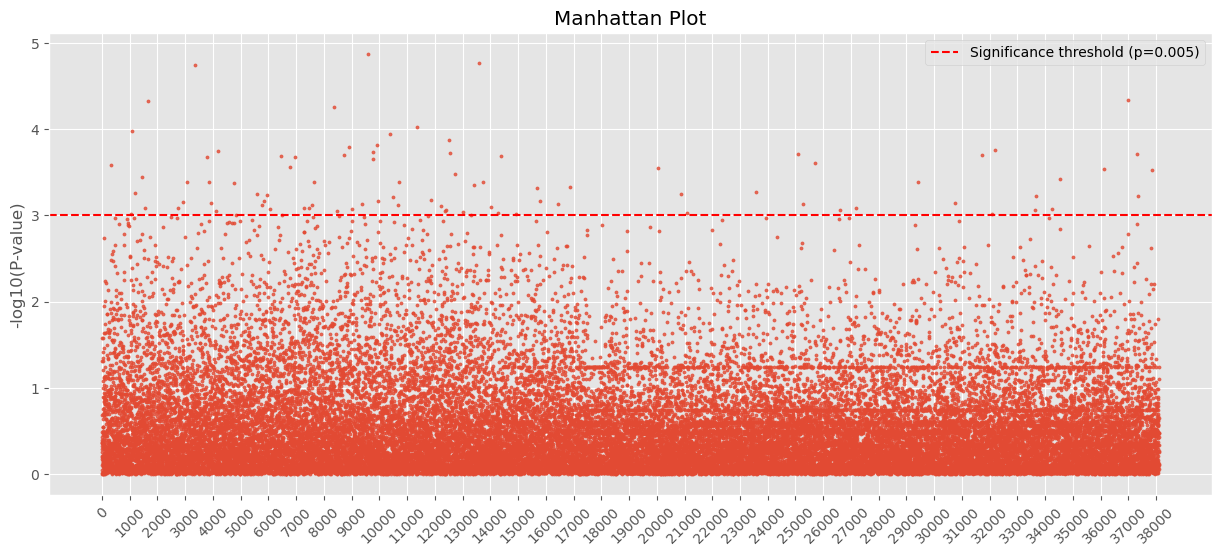

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

ax.scatter(positions, neg_log_p_values, s=5, alpha=0.8)
ax.set_ylabel('-log10(P-value)')
ax.set_title('Manhattan Plot')
ax.axhline(y=-np.log10(0.001), color='r', linestyle='--', label='Significance threshold (p=0.005)')
ax.set_xticks(np.arange(0, len(p_values) + 1, 1000))  # 示例刻度间隔，可调整
ax.set_xticklabels([str(i) for i in np.arange(0, len(p_values) + 1, 1000)], rotation=45)
ax.legend()

plt.show()

In [13]:
filtered_df = result_df[result_df["P_Value"] < 0.001]
filtered_df

,gene_name,Pearson_Correlation,P_Value
328,EHD3,0.888320,0.000258
1063,CYFIP1,0.847834,0.000978
1076,GPR116,0.908883,0.000107
1197,TFRC,0.867262,0.000545
1438,EDN1,0.879414,0.000360
...,...,...,...
49622,RP11-513G19.1,0.885098,0.000292
50828,RP11-588H23.3,0.924747,0.000046
51270,RP11-433J8.1,-0.895665,0.000192
51325,RP11-1012A1.7,-0.864265,0.000600


In [15]:
filtered_df.to_csv('genes.csv')